In [1]:
import json
import requests
import pandas as pd
import geopandas as gpd
import contextily as cx

In [2]:
overpass_url = "http://overpass-api.de/api/interpreter"

#     //node[amenity=bench](50.8103,4.3703,50.8173,4.3902);
overpass_query = """
[out:json][timeout:120];
area["ISO3166-1"="BE"];
(
    node(50.8103,4.3703,50.8173,4.3902);
    <;
);
out meta;
"""
response = requests.get(overpass_url, params={'data': overpass_query})
data = response.json()

In [3]:
df = pd.DataFrame(data["elements"])
df = gpd.GeoDataFrame(data=df, geometry=gpd.points_from_xy(df.lon, df.lat), crs="EPSG:4326")

In [4]:
sorted(df["user"].unique())[-10:]

['simonvanhooren',
 'ssatle',
 'stdevaux',
 'trrrem',
 'user_5359',
 'wardmuylaert',
 'wegspotter',
 'yxoc',
 'zors1843',
 'zouhairULBcampuslife']

In [5]:
df = df[df["user"].isin(["ULB Mobilité", "zouhairULBcampuslife"])]

In [6]:
df

,type,id,lat,lon,timestamp,version,changeset,user,uid,tags,nodes,members,geometry
570,node,634653860,50.813656,4.381243,2022-01-17T13:42:29Z,4,116255323,zouhairULBcampuslife,14874497,NaN,NaN,NaN,POINT (4.38124 50.81366)
575,node,660699101,50.814917,4.381406,2016-12-14T15:15:36Z,5,44400028,ULB Mobilité,4964430,NaN,NaN,NaN,POINT (4.38141 50.81492)
658,node,1028862529,50.813459,4.381853,2022-01-17T13:42:29Z,6,116255323,zouhairULBcampuslife,14874497,"{'entrance': 'yes', 'wheelchair': 'no'}",NaN,NaN,POINT (4.38185 50.81346)
674,node,1028862919,50.811537,4.381682,2022-01-19T18:03:48Z,2,116353155,zouhairULBcampuslife,14874497,"{'app': 'campuslife', 'building name': 'A', 'd...",NaN,NaN,POINT (4.38168 50.81154)
731,node,1029839890,50.815131,4.381867,2016-12-14T15:15:36Z,2,44400028,ULB Mobilité,4964430,NaN,NaN,NaN,POINT (4.38187 50.81513)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16486,way,590744278,NaN,NaN,2018-05-24T09:44:25Z,1,59236266,ULB Mobilité,4964430,{'highway': 'footway'},"[5639414586, 5639414587]",NaN,POINT (nan nan)
16488,way,590744284,NaN,NaN,2018-05-24T09:44:25Z,1,59236266,ULB Mobilité,4964430,{'highway': 'footway'},"[1733884979, 5639414594]",NaN,POINT (nan nan)
16489,way,590744287,NaN,NaN,2018-05-24T09:44:26Z,1,59236266,ULB Mobilité,4964430,{'highway': 'steps'},"[5639414594, 5639414593]",NaN,POINT (nan nan)
16490,way,590744290,NaN,NaN,2018-05-24T09:44:26Z,1,59236266,ULB Mobilité,4964430,{'highway': 'footway'},"[1028862533, 5639414597]",NaN,POINT (nan nan)


In [7]:
dir(cx.providers.OpenStreetMap)

['BZH', 'BlackAndWhite', 'CH', 'DE', 'France', 'HOT', 'Mapnik']

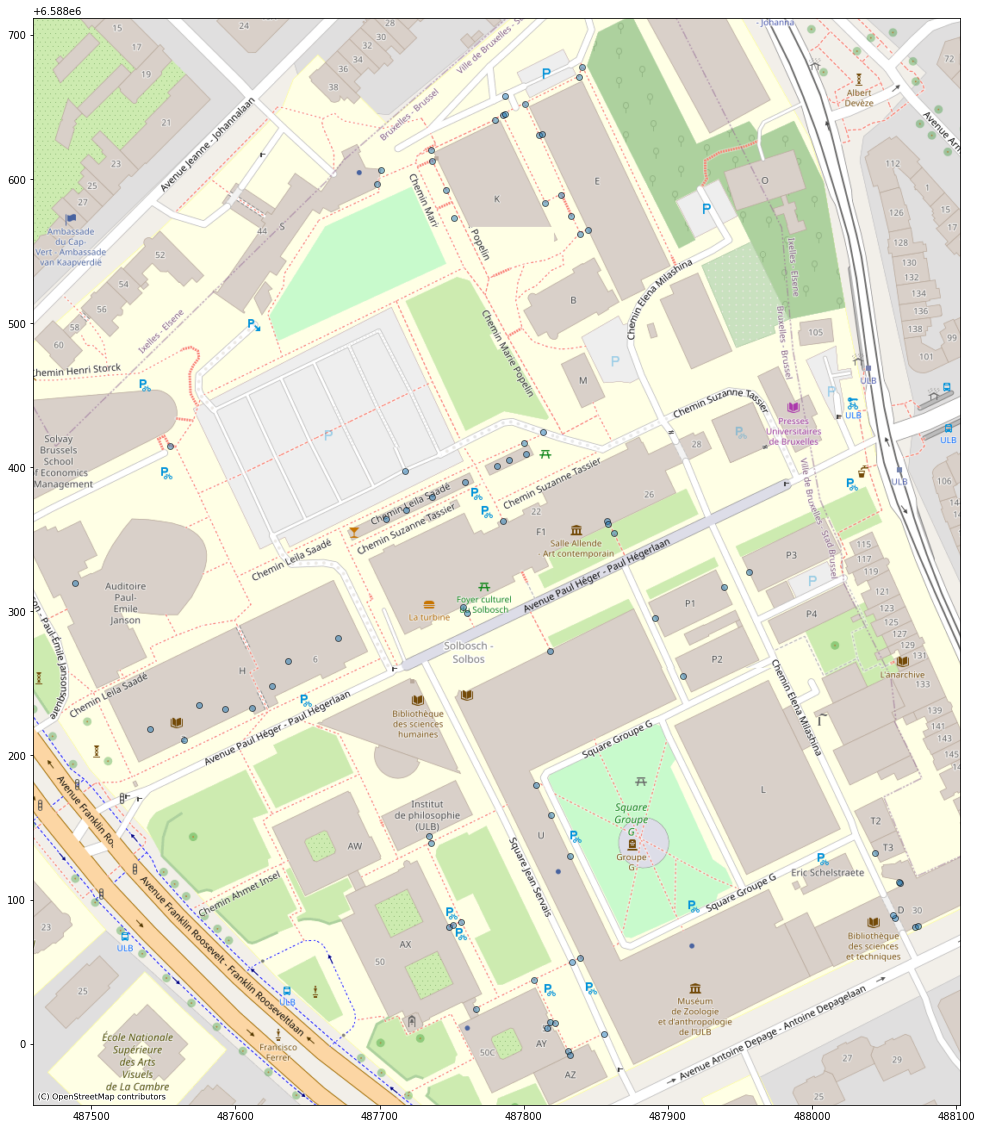

In [8]:
ax = df.to_crs(epsg=3857).plot(figsize=(20, 20), alpha=0.5, edgecolor='k')
cx.add_basemap(ax, crs='epsg:3857', source=cx.providers.OpenStreetMap.Mapnik)

In [9]:
df.loc[df["user"] == "zouhairULBcampuslife", "tags"]

570                                                    NaN
658                {'entrance': 'yes', 'wheelchair': 'no'}
674      {'app': 'campuslife', 'building name': 'A', 'd...
2794                     {'name': 'Ateliers roues libres'}
4035     {'app': 'campuslife', 'building name': 'U', 'd...
5727                                                   NaN
5728                                                   NaN
12047    {'app': 'campuslife', 'building name': 'U', 'd...
12442    {'addr:city': 'Ixelles - Elsene', 'addr:housen...
12802    {'app': 'campuslife', 'building name': 'A', 'd...
12806    {'app': 'campuslife', 'building name': 'A', 'd...
12820    {'app': 'campuslife', 'building name': 'T3', '...
13075    {'amenity': 'vending_machine', 'indoor': 'yes'...
14029    {'camera:mount': 'wall', 'camera:type': 'dome'...
14108                                                  NaN
14307    {'app': 'campuslife', 'building name': 'A', 'd...
14308    {'app': 'campuslife', 'building name': 'D', 'd.

In [22]:
df = df.loc[~df["lon"].isnull(),:]

In [23]:
with open("osm.json", "w") as handler:
    handler.write(df.to_json(na="null"))